# Emotion Detection


**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

print("Tensorflow version", tf.__version__)

Tensorflow version 2.16.1


**Directory paths**

In [2]:
train_dir = "train/"
test_dir = "test/"


**Data augmentation Preparing Data for Training**

In [3]:
img_size = (64,64)
batch_size = 64
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    validation_split=0.2  # Split training data for validation
)

**Data preprocessing for test set**

In [4]:

test_datagen = ImageDataGenerator(rescale=1./255)


**Load and preprocess training data**

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)


Found 22968 images belonging to 7 classes.


**Load and preprocess validation data**

In [6]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size, 
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

Found 5741 images belonging to 7 classes.


**Load and preprocess test data**

In [7]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 7178 images belonging to 7 classes.


**Define CNN model**

In [9]:

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(train_generator.class_indices), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

**Train the model**

In [11]:

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
)

Epoch 1/30


C:\Users\Suyash\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 57s 150ms/step - accuracy: 0.2349 - loss: 1.8485 - val_accuracy: 0.2918 - val_loss: 1.7694
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.2858 - loss: 1.7560 - val_accuracy: 0.3205 - val_loss: 1.7147
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.3111 - loss: 1.7164 - val_accuracy: 0.3386 - val_loss: 1.6608
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.3335 - loss: 1.6792 - val_accuracy: 0.3637 - val_loss: 1.6101
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.3470 - loss: 1.6448 - val_accuracy: 0.3876 - val_loss: 1.5811
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.3646 - loss: 1.6109 - val_accuracy: 0.3832 - val_loss: 1.5649
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.3756 - loss: 1.5912 - val_accuracy: 0.4067 - val_loss: 1.5330
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.3810 - loss: 1.5774 - val

**Plot training history**

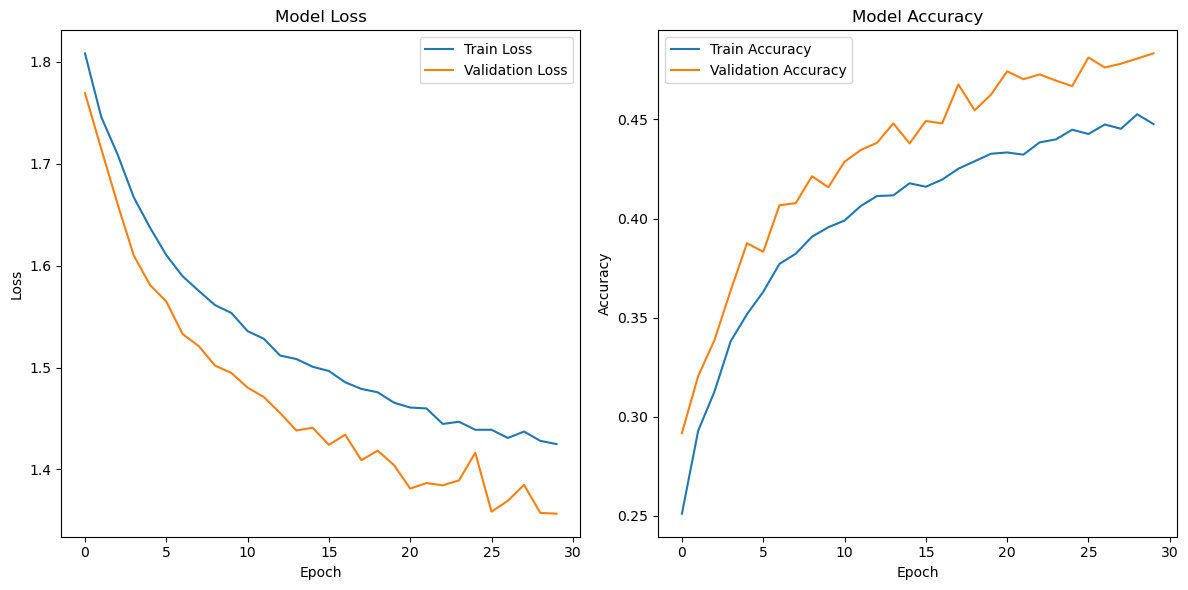

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Model Saving**

In [14]:
model_json = model.to_json()
with open("emotion_detector_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(".weights.h5")
print("Model saved to disk")

Model saved to disk
